# Data Visualization exercise

In [3]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [5]:
### Using .head() and .tail() to see data content
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [6]:
### .info() to provide information on the data
euk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [20]:
### What to do with '-' values?
## Change "-" into NAs
euk.replace('-', pd.NA, inplace=True)

## Visualize the relationship between two variables

Can you see the relationship between genome size and the number of genes?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [ ]:
## Look only look at reptile data using class 'Reptiles'
reptile_data = euk[euk['class'] == 'Reptiles']


In [10]:
## Pick out data for just Reptiles with genome size < 4000
reptile_genomes_under_4000 = euk[(euk['Class'] == 'Reptiles') & (euk['Size (Mb)'] < 4000)]



### Use `relplot` to look at relationships
We will use the `relplot` function, and the names of the columns that we want on the `X` and `Y` axes to look at the relationship between genome size and number of genes in Reptiles

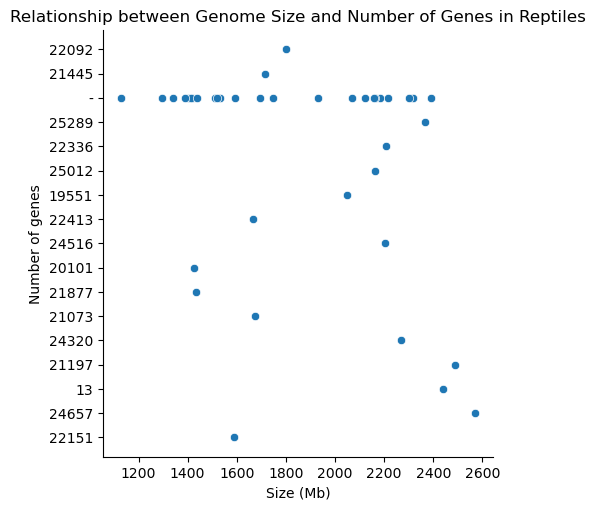

In [11]:
reptile_genomes_under_4000 = euk[(euk['Class'] == 'Reptiles') & (euk['Size (Mb)'] < 4000)]
sns.relplot(x='Size (Mb)', y='Number of genes', data=reptile_genomes_under_4000)
plt.title('Genome Size and Number of Genes in Reptiles')
plt.show()


### Can you create a new column to look at gene density?
gene density = Number of genes / Size (Mb)

In [13]:
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')
euk['Size (Mb)'] = pd.to_numeric(euk['Size (Mb)'], errors='coerce')
euk['Gene Density'] = euk['Number of genes'] / euk['Size (Mb)']
euk.head()


,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Gene Density
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549.0,38554,2013,Scaffold,229.901715
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311.0,48265,2001,Chromosome,320.141390
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847.0,71219,2010,Chromosome,61.127873
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603.0,41939,2011,Chromosome,91.065184
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200.0,37660,2010,Chromosome,37.665284


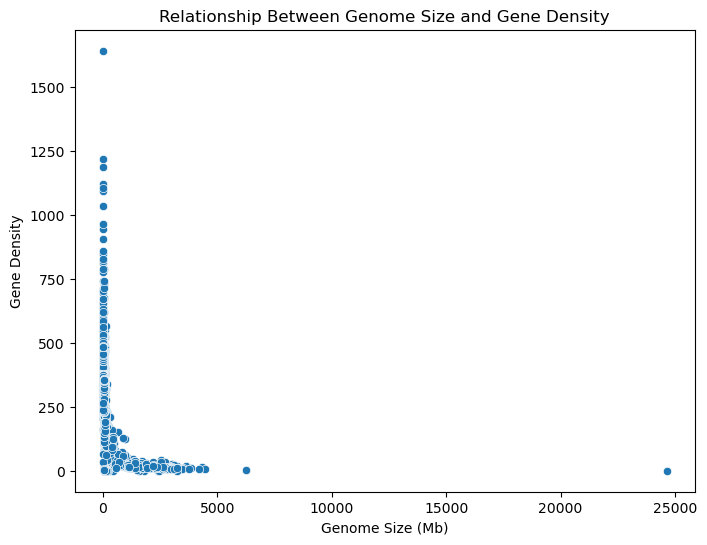

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=euk['Size (Mb)'], y=euk['Gene Density'])
plt.xlabel('Genome Size (Mb)')
plt.ylabel('Gene Density')
plt.title('Relationship Between Genome Size and Gene Density')
plt.show()

## Seaborn
These are other `kind` plots that we did not try in lectures. Look up seaborn documentation and try to create these new plots.

1.   Create a violin plot for genome size distribution against Class Land Plants.
2.   Create a scatter plot showing the relationship between Kingdom and Publication year
3. Create a bar plot for GC% for each Kingdom

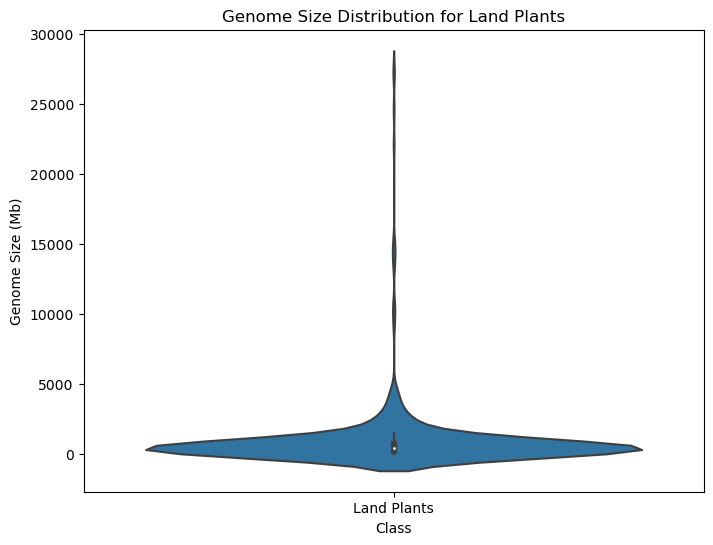

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=euk[euk['Class'] == 'Land Plants']['Class'],
y=euk[euk['Class'] == 'Land Plants']['Size (Mb)'])

plt.xlabel('Class')
plt.ylabel('Genome Size (Mb)')
plt.title('Genome Size Distribution for Land Plants')
plt.show()



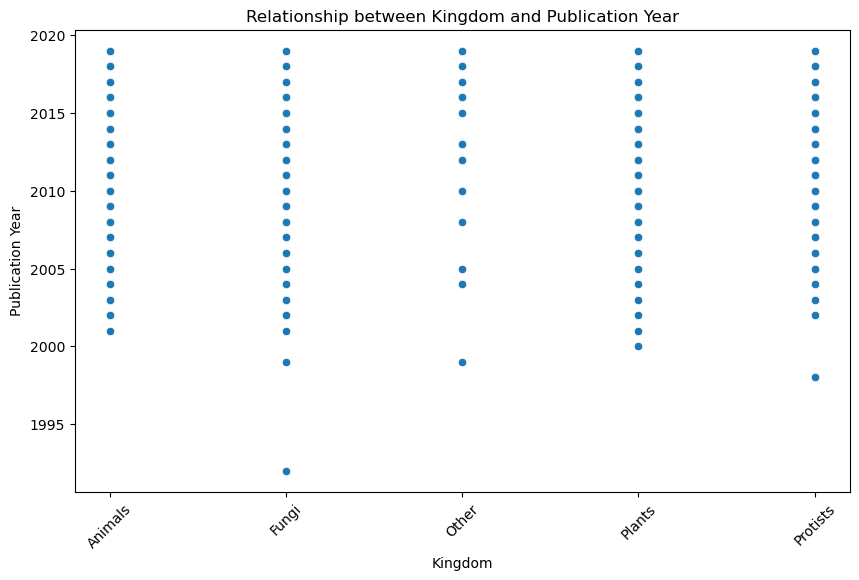

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=euk['Kingdom'], y=euk['Publication year'])
plt.xticks(rotation=45)
plt.xlabel('Kingdom')
plt.ylabel('Publication Year')
plt.title('Relationship between Kingdom and Publication Year')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


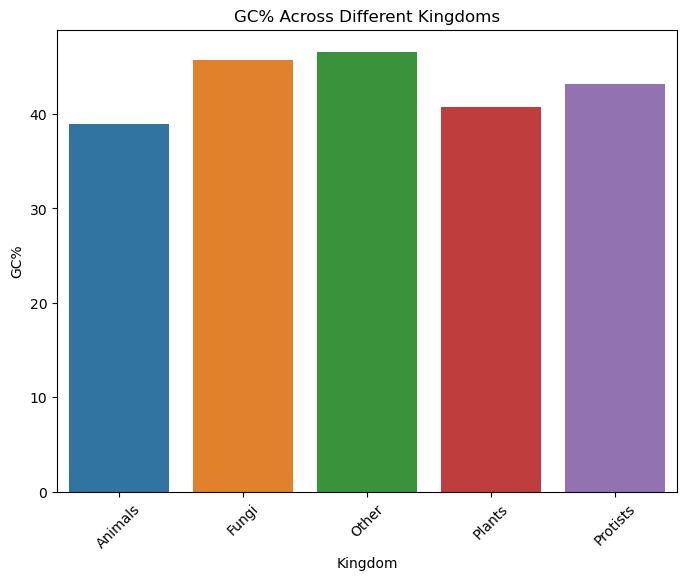

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure GC% is numeric and Kingdom is categorical
euk['GC%'] = pd.to_numeric(euk['GC%'], errors='coerce')
euk['Kingdom'] = euk['Kingdom'].astype('category')

plt.figure(figsize=(8, 6))
sns.barplot(x='Kingdom', y='GC%', data=euk, errorbar=None)

plt.xlabel('Kingdom')
plt.ylabel('GC%')
plt.title('GC% Across Different Kingdoms')
plt.xticks(rotation=45)
plt.show()


In [28]:
print(euk.columns)

Index(['Species', 'Kingdom', 'Class', 'Size (Mb)', 'GC%', 'Number of genes',
       'Number of proteins', 'Publication year', 'Assembly status',
       'Gene Density'],
      dtype='object')
